core           INFO 	Loading data for British Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a futur

C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] 

C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\edgie\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will

RoundNumber                                                       12
Country                                               United Kingdom
Location                                                 Silverstone
OfficialEventName    FORMULA 1 QATAR AIRWAYS BRITISH GRAND PRIX 2024
EventDate                                        2024-07-07 17:00:00
EventName                                         British Grand Prix
EventFormat                                             conventional
Session1                                                  Practice 1
Session1Date                                     2024-07-05 12:30:00
Session2                                                  Practice 2
Session2Date                                     2024-07-05 16:00:00
Session3                                                  Practice 3
Session3Date                                     2024-07-06 11:30:00
Session4                                                  Qualifying
Session4Date                      

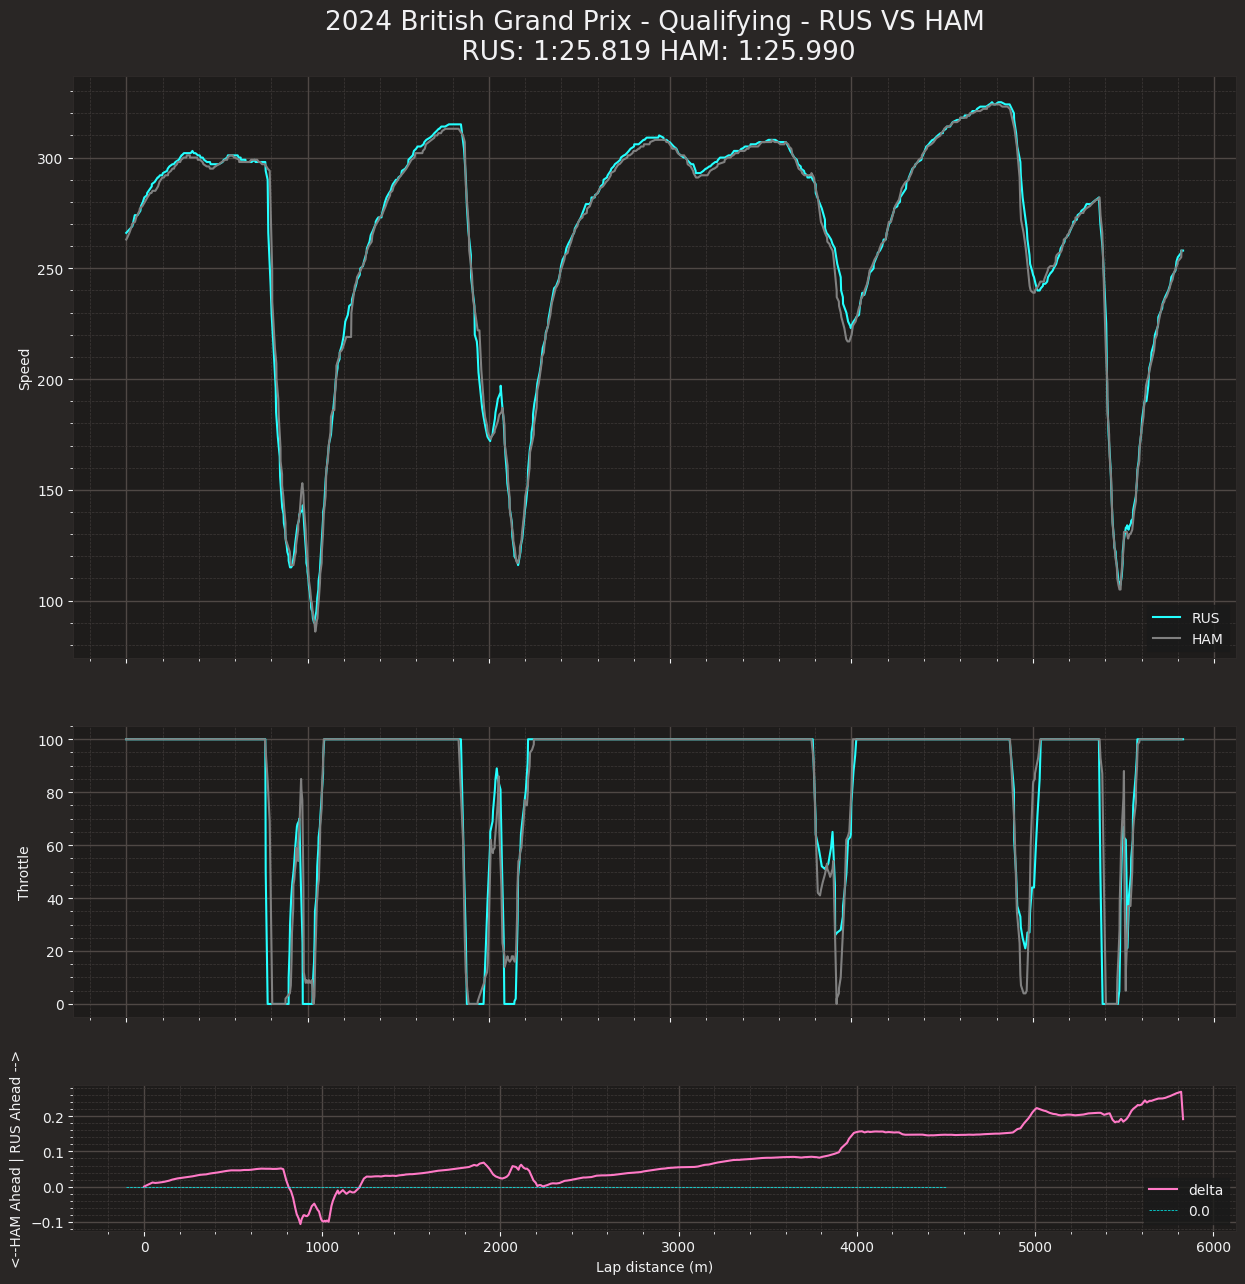

In [39]:
import fastf1 as f1
from fastf1 import plotting
from fastf1.plotting import driver_color
from fastf1 import utils

from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

plotting.setup_mpl(color_scheme='fastf1')
f1.Cache.enable_cache('cache')

#Pick GP and Session
year, gp, session = 2024, 'Silverstone', 'Q'

race = f1.get_session(year, gp, session)
race.load()

#Pick Drivers
d1, d2 = 'RUS', 'HAM'

laps_d1 = race.laps.pick_driver(d1)
laps_d2 = race.laps.pick_driver(d2)

fastest_d1 = laps_d1.pick_fastest()
fastest_d2 = laps_d2.pick_fastest()


telemetry_d1 = fastest_d1.get_telemetry().add_distance()
telemetry_d2 = fastest_d2.get_telemetry().add_distance()

team_d1 = fastest_d1['Team']
team_d2 = fastest_d2['Team']

delta_time, ref_tel, compare_tel = utils.delta_time(fastest_d1, fastest_d2)

print(race.event)

d1_laptime = fastest_d1['LapTime'].seconds
d1_micro = fastest_d1['LapTime'].microseconds
d2_laptime = fastest_d2['LapTime'].seconds
d2_micro = fastest_d2['LapTime'].microseconds

d1_formatted = f'{int(d1_laptime // 60)}:{int(d1_laptime % 60)}.{d1_micro // 1000}'
d2_formatted = f'{int(d2_laptime // 60)}:{int(d2_laptime % 60)}.{d2_micro // 1000}'


#Set Title
plot_size = [15,15]
plot_title = f"{race.event.year} {race.event.EventName} - {race.name} - {d1} VS {d2}\n {d1}: {d1_formatted} {d2}: {d2_formatted}"
plot_ratios = [4, 2, 1]
plot_filename = f"{year}_{gp}_{d1}{d2}_Q.png"

plt.rcParams['figure.figsize'] = plot_size
fig, ax = plt.subplots(3, gridspec_kw = {'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

#Set Colors
ax[0].plot(telemetry_d1['Distance'], telemetry_d1['Speed'], label = d1, color= driver_color(d1))
ax[0].plot(telemetry_d2['Distance'], telemetry_d2['Speed'], label = d2, color='gray')#driver_color(d2))
ax[0].set(ylabel = 'Speed')
ax[0].legend(loc="lower right")

ax[1].plot(telemetry_d1['Distance'], telemetry_d1['Throttle'], label = d1, color= driver_color(d1))
ax[1].plot(telemetry_d2['Distance'], telemetry_d2['Throttle'], label = d2, color='gray')#driver_color(d2))
ax[1].set(ylabel = 'Throttle')

ax[2].plot(ref_tel['Distance'], delta_time, label = "delta")
ax[2].set(ylabel=f"<--{d2} Ahead | {d1} Ahead -->")
ax[2].hlines(y = 0, xmin = -100, xmax = 4500, linestyle = 'dashed', linewidth = .5, color = 'cyan', label = "0.0")
ax[2].set(xlabel='Lap distance (m)')
ax[2].legend(loc="lower right")

for a in ax.flat:
    a.label_outer()






In [40]:
plt.savefig(plot_filename, dpi=300)
plt.show()

<Figure size 1500x1500 with 0 Axes>